Data: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [1]:
INPUT_PATH = './data/CC GENERAL.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from scipy.stats.mstats import winsorize 

In [3]:
#read the data

data_path = INPUT_PATH  #the path where you downloaded the data
df_raw = pd.read_csv(data_path)

print('The shape of the dataset is:', df_raw.shape)

The shape of the dataset is: (8950, 18)


In [8]:
df_raw.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [33]:
df_raw.drop('CUST_ID' ,axis =1 , inplace=True)

In [34]:
df = df_raw.copy()
df.dropna(inplace=True)

# 3 handling skewness in the data (log transforamtion)

<AxesSubplot:ylabel='Count'>

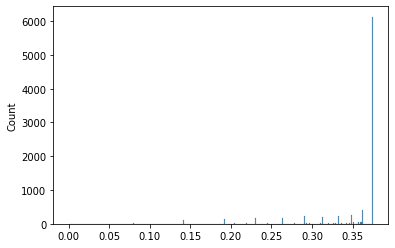

In [127]:
col = 'BALANCE_FREQUENCY'
#trial = df[col].drop(df[df[col] ==0].index)
out = scipy.stats.boxcox(df[col] + 1, lmbda = -2)#+ np.mean(df[col])
sns.histplot(out)

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

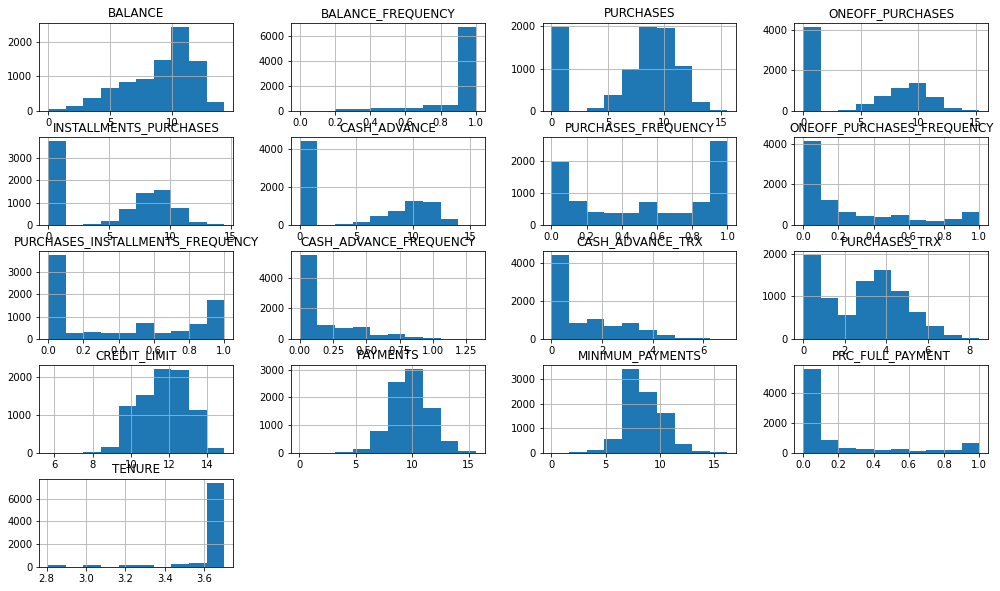

In [128]:
df_v0 = df.copy()
for col in df.columns:
    df_v0[col] =  np.log2(1+df[col])
df_v0.hist(figsize=(17,10))

# 4 scaling the data

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

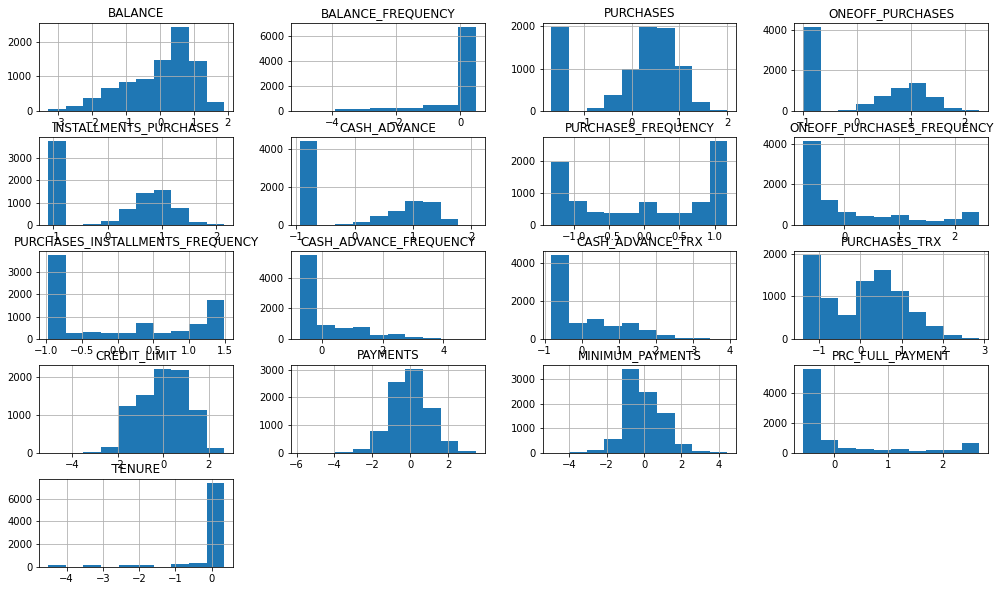

In [167]:
standard_scaler = StandardScaler()
df_v0_scaled = pd.DataFrame(standard_scaler.fit_transform(df_v0) )
df_v0_scaled.columns = df_v0.columns
df_v0_scaled.hist(figsize=(17,10))

# 5 handling outliers:

In [137]:
Idx = (np.abs(scipy.stats.zscore(df)) < 3).all(axis=1)
df[Idx]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8876   121.294493           0.750000     385.26            385.26   
8877    55.147722           0.875000     163.31              0.00   
8878   869.328293           0.750000       0.00              0.00   
8879   137.744895           1.000000     441.00              0.00   
8880   331.070135           0.750000      81.20             81.20   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8876                    0.00    169.554775             0.500000   
8877                  163.31      0.000000             0.875000   
8878                    0.00   1153.925205             0.000000   
8879                  441.00      0.000000             0.750000   
8880                    0.00    419.341394             0.125000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8876                    0.500000                          0.000000   
8877                    0.000000                          0.750000   
8878                    0.000000                          0.000000   
8879                    0.000000                          0.625000   
8880                    0.125000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                      0.000                 0              2        1000.0   
1                      0.250                 4              0        7000.0   
2                      0.000                 0             12        7500.0   
4                      0.000                 0              1        1200.0   
5                      0.000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8876                   0.125                 3              7         500.0   
8877                   0.000                 0              7        1000.0   
8878                   0.125                 3              0        1200.0   
8879                   0.000                 0              6        1000.0   
8880                   0.250                 7              1         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8876    98.225317        113.944625          0.000000       8  
8877    62.619008        109.580539          0.000000       8  
8878   150

In [143]:
Idx = np.abs(scipy.stats.zscore(df < 3).all(axis=1))
df[Idx]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

### removing outliers using winsorize (0.05, 0.05)
#### it removes the elements below 5th quantile and above 95th quantile

In [164]:
df_v1 = pd.DataFrame()
for col in df_v0_scaled.columns:
    temp = winsorize( df_v0_scaled[col],limits=[0.05 , 0.05] )
    df_v1[col] = pd.DataFrame(temp , columns=[col])

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

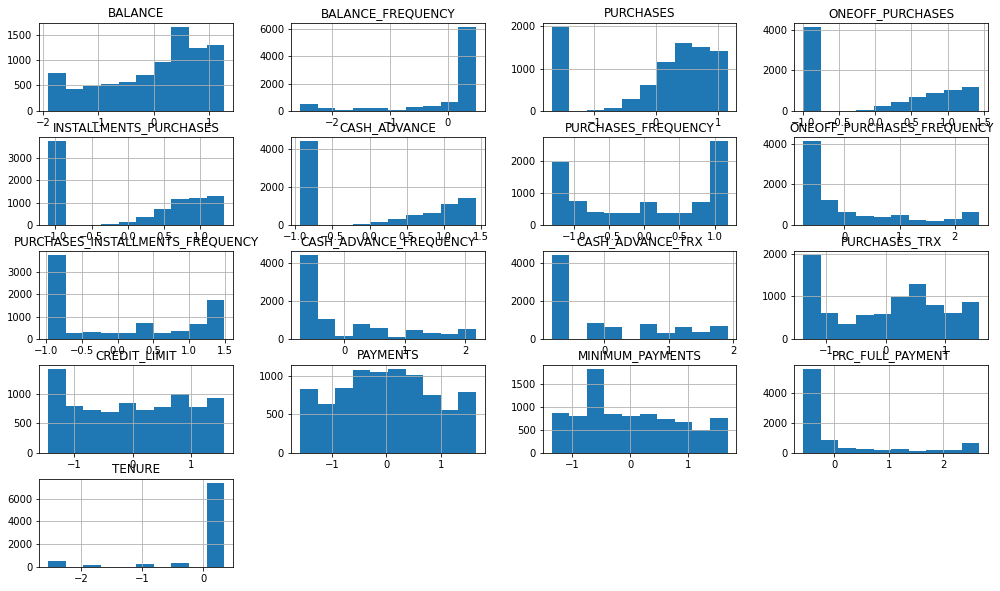

In [166]:
df_v1.hist(figsize=(17,10))

In [168]:
df_v0_scaled.describe()['CREDIT_LIMIT']

count    8.636000e+03
mean     1.329594e-15
std      1.000058e+00
min     -5.068439e+00
25%     -8.770442e-01
50%     -1.129413e-01
75%      8.271247e-01
max      2.686891e+00
Name: CREDIT_LIMIT, dtype: float64

In [169]:
df_v1.describe()['CREDIT_LIMIT']

count    8636.000000
mean        0.007930
std         0.937381
min        -1.448165
25%        -0.877044
50%        -0.112941
75%         0.827125
max         1.572642
Name: CREDIT_LIMIT, dtype: float64

In [172]:
np.quantile(df_v0_scaled['CREDIT_LIMIT'],q=0.95)

1.572641535962801

In [179]:
arr = np.sort(df_v0_scaled['CREDIT_LIMIT'] )#.unique()
arr[5*len(arr)//100]

-1.4481647148612626

## 6 perform pca (dimensionality reduction)
## try kpca (non linear dimensionality reduction technique)

In [316]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
pca = PCA(n_components=0.95) 
df_v2_pca = pd.DataFrame(pca.fit_transform(df_v1))
print (pca.explained_variance_ratio_)
print('\n sum of explained variance is ',np.sum(pca.explained_variance_ratio_))
print('number of components is %d'%len(pca.explained_variance_ratio_))

[0.37503995 0.21652111 0.10309315 0.07462001 0.05898701 0.04186425
 0.03280926 0.02751489 0.01798619 0.01585589]

 sum of explained variance is  0.9642917021608466
number of components is 10


In [317]:
kpca = KernelPCA(n_components=10 , kernel='rbf')
df_v2_kpca = pd.DataFrame(kpca.fit_transform(df_v1))


# 7 clustering techniques 

## 7.1 kmeans

In [301]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_v2_pca)
labels = kmeans.labels_
for label in set(labels) :
    print("sum of elements that contain in cluster %d :"%label,(labels == label).sum())


sum of elements that contain in cluster 0 : 2258
sum of elements that contain in cluster 1 : 1418
sum of elements that contain in cluster 2 : 1847
sum of elements that contain in cluster 3 : 1406
sum of elements that contain in cluster 4 : 1707


In [407]:
from scipy.spatial.distance import cdist
def elbow_method (df):
    intertias , distortions = [] , []
    k_list = (range(1,10))
    for k in k_list: 
        kmeans = KMeans(n_clusters=k , max_iter=300 , random_state=42).fit(df)
        intertias.append(kmeans.inertia_)
        distortions.append(sum(np.min(cdist(df, kmeans.cluster_centers_,
                                            'euclidean'), axis=1)) / df.shape[0])


    ## plot k versus the inertia ##    
    plt.figure(figsize=(16,8))
    plt.plot(k_list,intertias,'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

    ## plot k versus the distances (distortion) ##
    plt.figure(figsize=(16,8))
    plt.plot(k_list,distortions,'bx-')
    plt.xlabel('k')
    plt.ylabel('distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    

# 7 perfom t-sne to visualize the data:

In [417]:
def kmeans_function(df , k=6):
    '''returns df with new column ('cluster') indicates the cluster of each row'''
    ## kmeans ##
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    labels = kmeans.labels_
    for label in set(labels) :
        print("sum of elements that contain in cluster %d :"%label,(labels == label).sum())

    df_v3 = df.copy()
    df_v3['cluster'] = kmeans.labels_
    return df_v3


def tsne_function(df):
    '''returns data frame of two features (new features by tsne)'''
    ## tsne ##
    print('################# performing tsne ###################')
    tsne = TSNE(n_components=2 , early_exaggeration=12 , n_jobs=-1 , perplexity=30 ,random_state=42)
    tsne = TSNE(n_components=2, 
                       perplexity=30, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=-1, 
                       n_iter=10**4, 
                       random_state=42)
    tsne_projection = tsne.fit_transform(df) #2d numpy array

    ## convert to data frame and plot ##
    df_tsne = pd.DataFrame(tsne_projection )
    print('======================done=========================')
    return df_tsne


def silhoutte_function(df):
    '''this silhoutte function for the kmeans'''
    range_n_cluster = list(range(2,11))
    silhoutte_score = []
    best_cluster_model = None 

    for n_clusters in range_n_cluster:
        cluster_model  = KMeans(n_clusters=n_clusters , random_state=42).fit(df)
        cluster_labels = cluster_model.labels_

        silhouette_avg = silhouette_score(df , cluster_labels)
        silhoutte_score += [silhouette_avg]

        if silhouette_avg >= np.max(silhoutte_score):
            best_cluster_model = cluster_model
    plt.plot(range_n_cluster, silhoutte_score)
    plt.axvline(best_cluster_model.n_clusters, color='black')
    return best_cluster_model


def get_best_k(df):
    '''plots the k with distortion , inertia and silhoute scores for different ks'''
    elbow_method(df)
    silhoutte_function(df)
    


In [409]:
#### attention takes time ###########

In [410]:
## tsne on the whole data ##
df_tsne = tsne_function(df_v1)

################# performing tsne ###################
======================done=========================


#### clustering based on the whole features

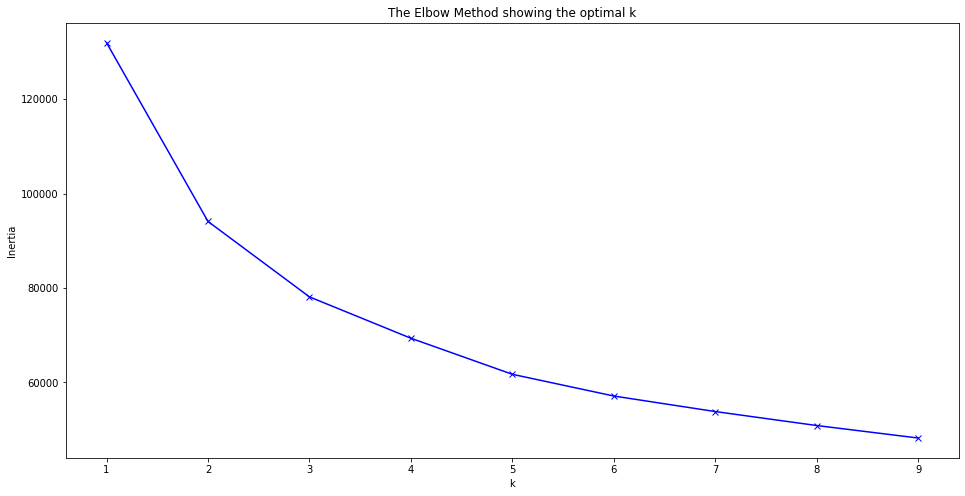

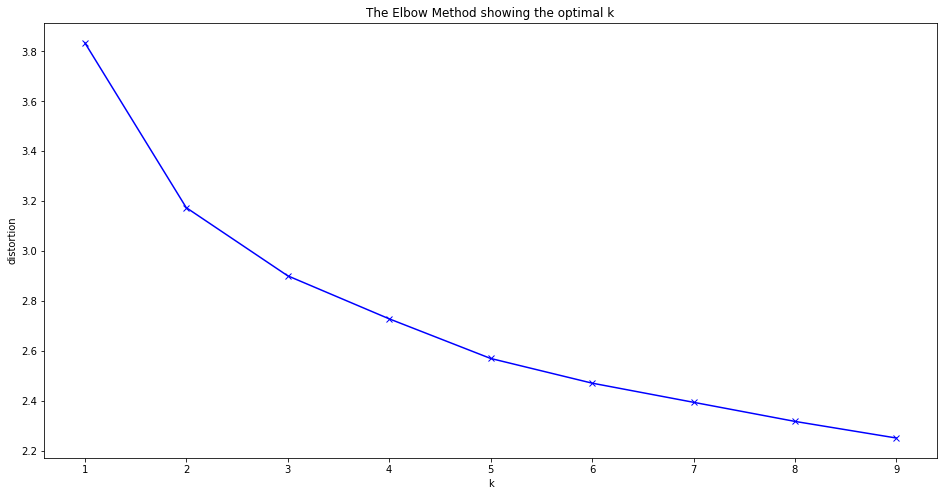

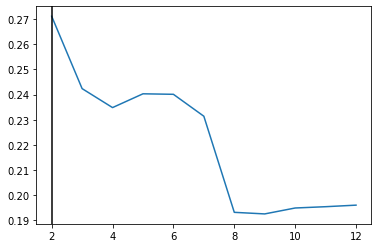

In [411]:
get_best_k(df_v1)

In [412]:
k= 6
## kmeans ##
df_clustered = kmeans_function(df_v1 , k=k)

px.scatter( x = df_tsne[0] , y = df_tsne[1]  , color=df_clustered['cluster'])

sum of elements that contain in cluster 0 : 1193
sum of elements that contain in cluster 1 : 1411
sum of elements that contain in cluster 2 : 2205
sum of elements that contain in cluster 3 : 1654
sum of elements that contain in cluster 4 : 889
sum of elements that contain in cluster 5 : 1284


#### clustering based on pca features

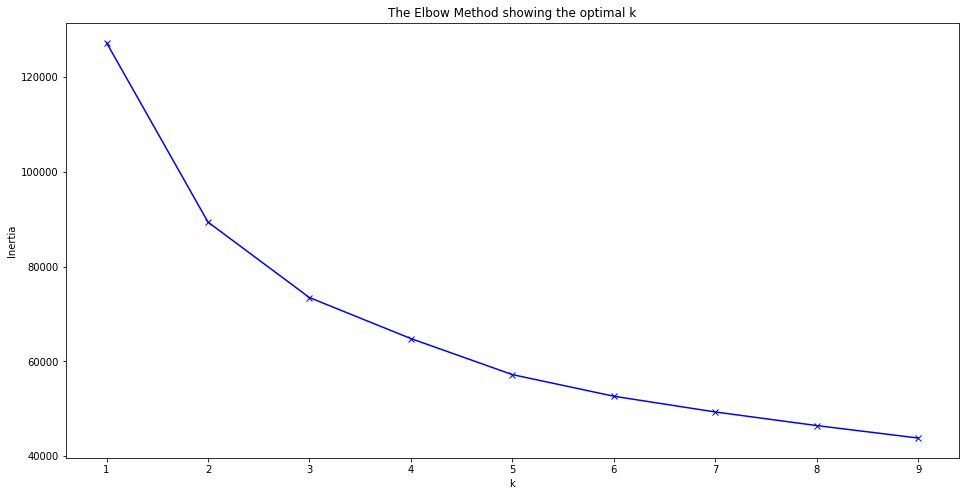

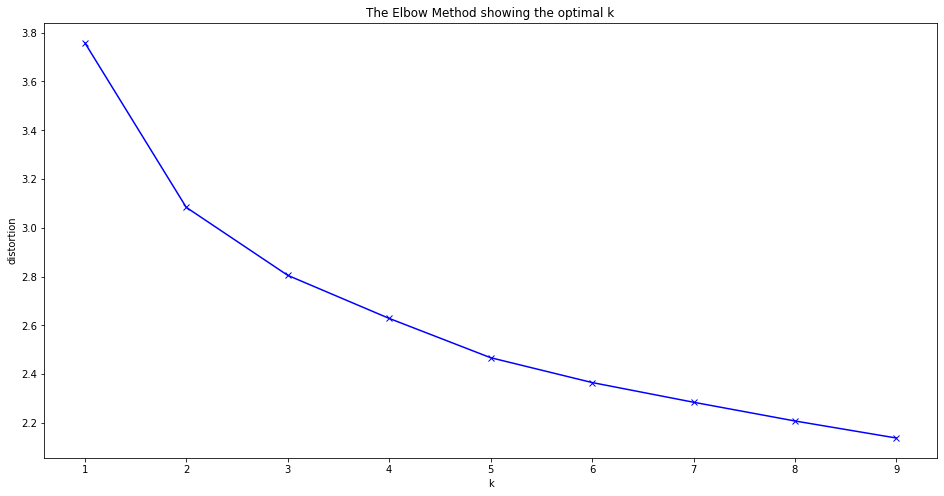

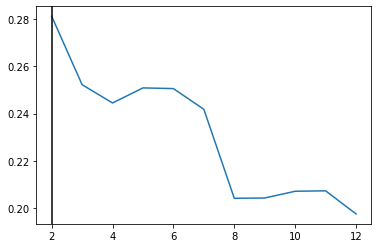

In [413]:
get_best_k(df_v2_pca)

In [414]:

k= 7
## kmeans ##
df_clustered = kmeans_function(df_v2_pca, k =k)

px.scatter( x = df_tsne[0] , y = df_tsne[1] ,text=df_clustered['cluster'] , color=df_clustered['cluster'])


sum of elements that contain in cluster 0 : 2181
sum of elements that contain in cluster 1 : 1283
sum of elements that contain in cluster 2 : 1162
sum of elements that contain in cluster 3 : 1054
sum of elements that contain in cluster 4 : 1042
sum of elements that contain in cluster 5 : 1153
sum of elements that contain in cluster 6 : 761


#### clustering based on kernel pca

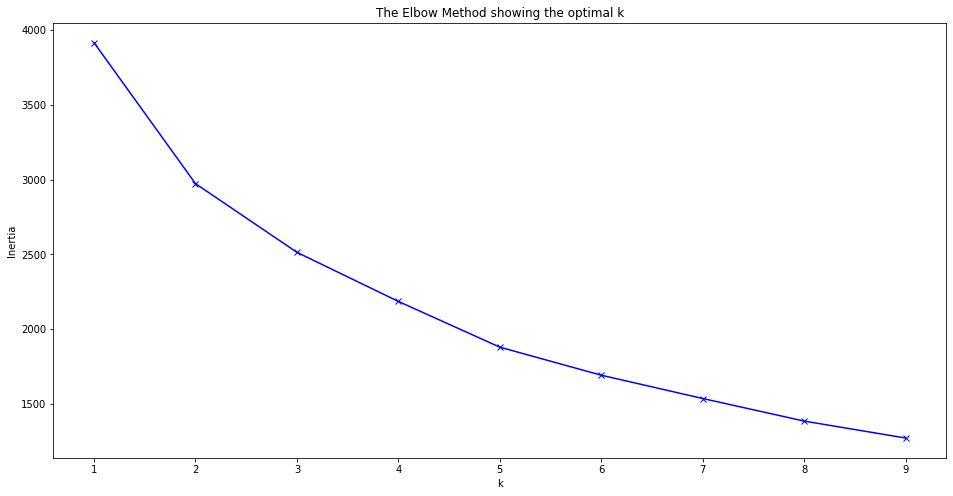

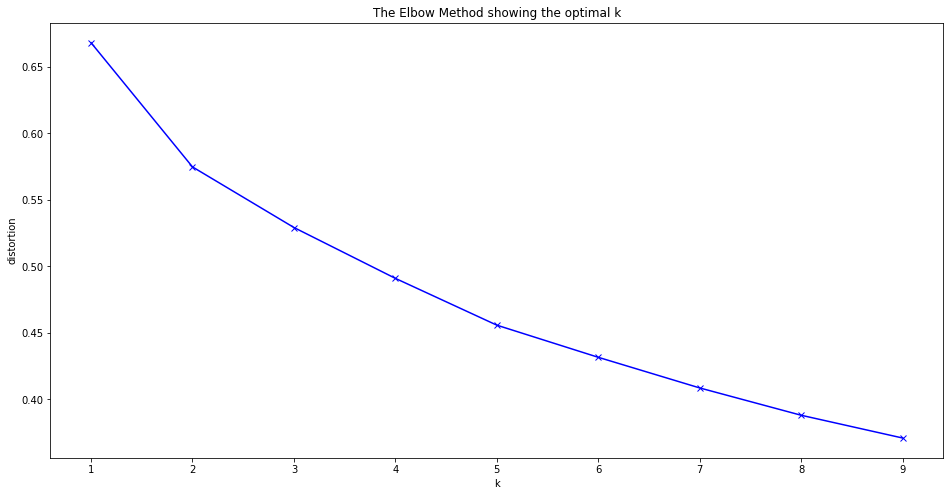

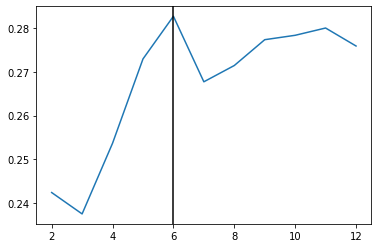

In [415]:
get_best_k(df_v2_kpca)

In [416]:
k= 6
## kmeans ##
df_clustered = kmeans_function(df_v2_kpca , k=k)

px.scatter( x = df_tsne[0] , y = df_tsne[1]  , color=df_clustered['cluster'])

sum of elements that contain in cluster 0 : 1163
sum of elements that contain in cluster 1 : 2045
sum of elements that contain in cluster 2 : 1561
sum of elements that contain in cluster 3 : 1452
sum of elements that contain in cluster 4 : 1438
sum of elements that contain in cluster 5 : 977


### performing clustering on the ouput of T-sne (on pca features)

In [401]:
## performing tsne on the ouput of pca##
df_tsne = tsne_function(df_v2_pca)

################# performing tsne ###################
======================done=========================


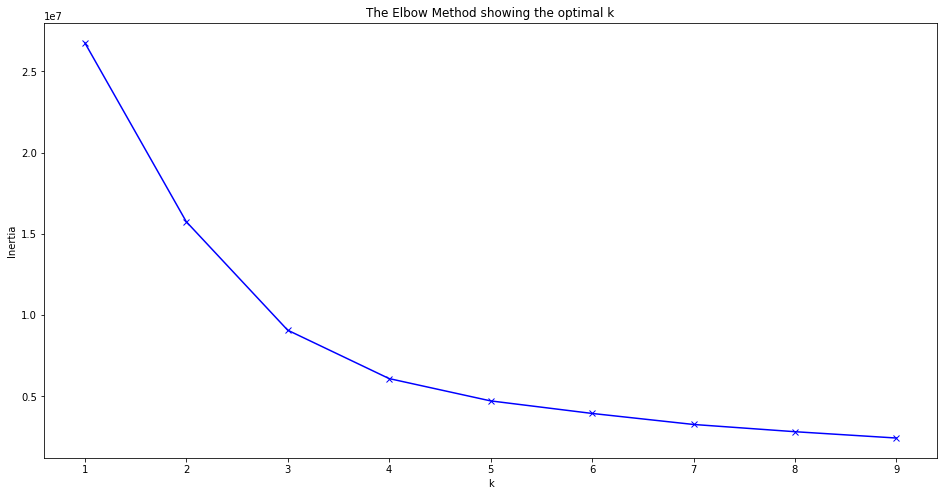

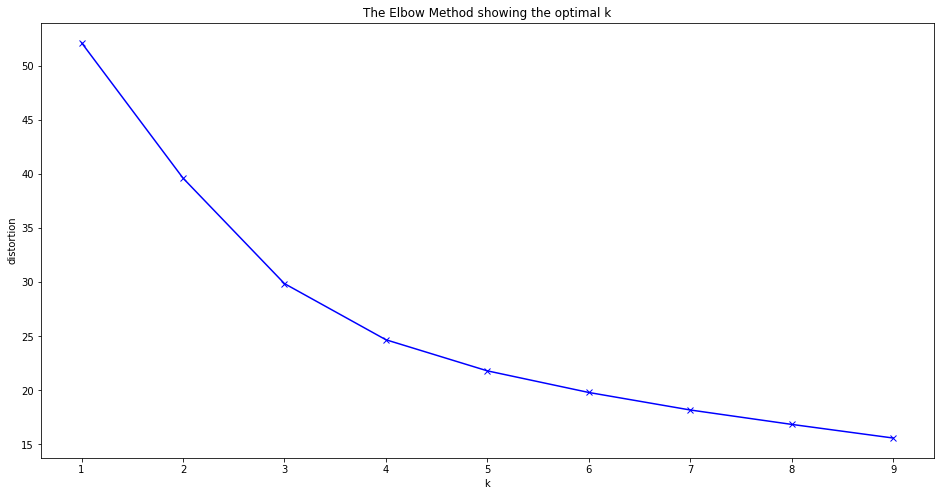

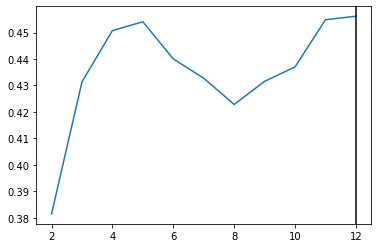

In [402]:
get_best_k(df_tsne)

In [403]:

k= 5
## kmeans ##
df_clustered = kmeans_function(df_tsne , k=k)

px.scatter( x = df_tsne[0] , y = df_tsne[1]  , color=df_clustered['cluster'])

sum of elements that contain in cluster 0 : 1656
sum of elements that contain in cluster 1 : 1392
sum of elements that contain in cluster 2 : 1552
sum of elements that contain in cluster 3 : 2046
sum of elements that contain in cluster 4 : 1990


### T-sne on the full data then clustering the ouput

In [395]:
## performing tsne on the full data then clustering the ouput ##
df_tsne = tsne_function(df_v1)

################# performing tsne ###################
======================done=========================


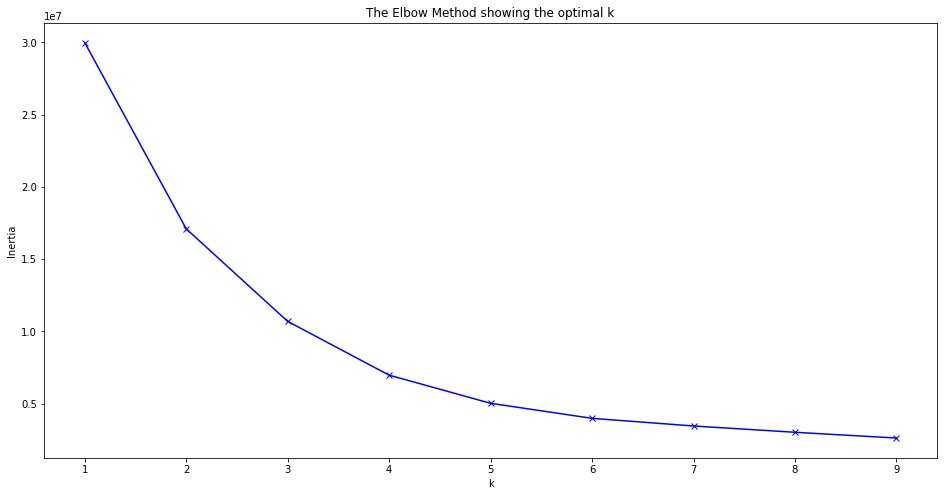

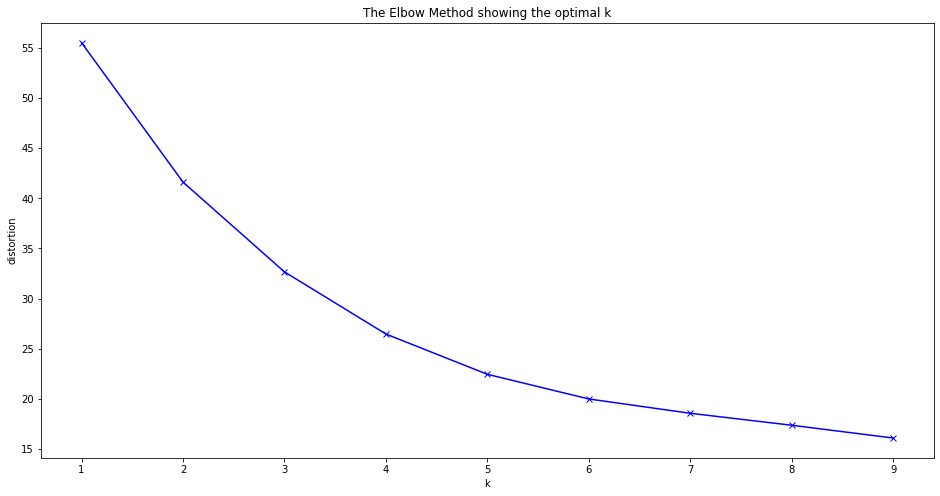

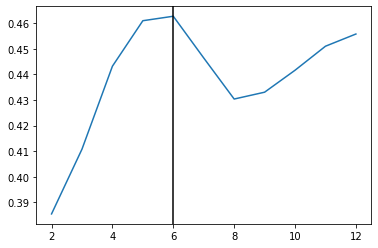

In [396]:
get_best_k(df_tsne)

In [399]:
k= 6
## kmeans ##
df_clustered = kmeans_function(df_tsne , k=k)

px.scatter( x = df_tsne[0] , y = df_tsne[1]  , color=df_clustered['cluster'])

sum of elements that contain in cluster 0 : 1062
sum of elements that contain in cluster 1 : 1409
sum of elements that contain in cluster 2 : 1574
sum of elements that contain in cluster 3 : 1736
sum of elements that contain in cluster 4 : 1178
sum of elements that contain in cluster 5 : 1677


#### comment : 
1- <B/> the clustering on the T-sne ouput is better but we don't know if T-sne preserves the information of the original data </B> <br>
2- using k means to cluster the data is not very efficient as silhoutte score is only 28% at best


# aggomolaritve clustering 

In [ ]:
df_tsne = tsne_function(df_v1)

In [460]:
def silhoutte_function_aggomolorative(df ,linkage = 'ward'):
    
    range_n_cluster = list(range(2,11))
    silhoutte_score = []
    best_cluster_model = None 
    for n_clusters in range_n_cluster:
            cluster_model = AgglomerativeClustering(n_clusters=n_clusters, 
                                    linkage = linkage).fit(df)

            cluster_labels = cluster_model.labels_

            silhouette_avg = silhouette_score(df , cluster_labels)
            silhoutte_score += [silhouette_avg]

            if silhouette_avg >= np.max(silhoutte_score):
                best_cluster_model = cluster_model
    plt.plot(range_n_cluster, silhoutte_score)
    plt.axvline(best_cluster_model.n_clusters, color='black')
    return best_cluster_model

#### 1- trying average method 

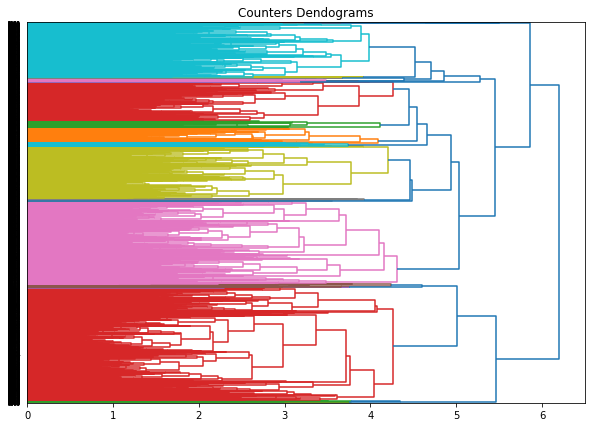

In [432]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_v1 , method='average',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function
    

AgglomerativeClustering(linkage='average')

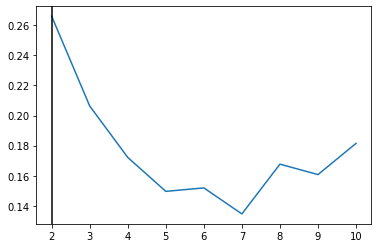

In [461]:
silhoutte_function_general(df_v1 ,linkage = 'average')

In [451]:
##training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, 
                                    linkage='average').fit(df_v1)

df_clustered['cluster'] = clustering.labels_
px.scatter( x = df_tsne[0] , y = df_tsne[1]  , color=df_clustered['cluster'])

#### 2- trying the complete method 

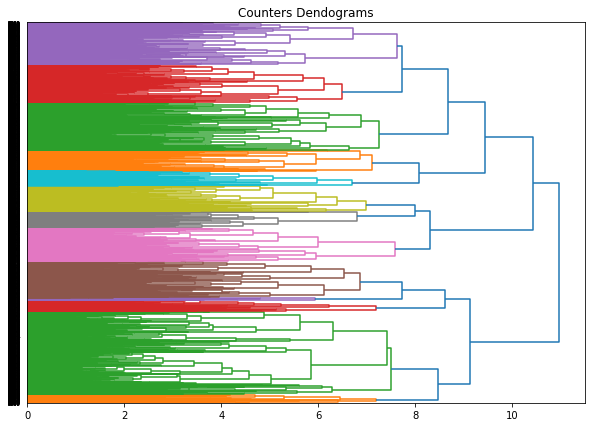

In [437]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_v1 , method='complete',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                    #and metric with distance function
    

AgglomerativeClustering(linkage='complete')

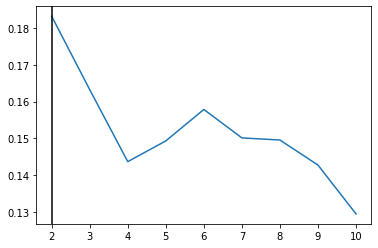

In [462]:
silhoutte_function_general(df_v1 ,linkage = 'complete')

In [452]:
##training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3 ,
                                     affinity='euclidean' , 
                                     linkage= 'complete').fit(df_v1)

df_clustered['cluster'] = clustering.labels_
px.scatter( x = df_tsne[0] , y = df_tsne[1]  , color=df_clustered['cluster'])


#### 3- trying the ward method

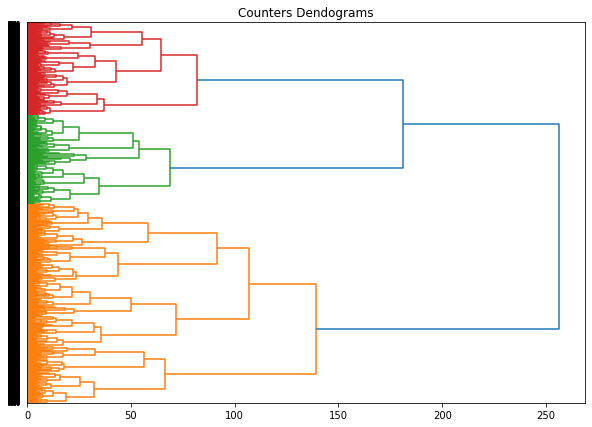

In [446]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_v1 , method='ward',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                    #and metric with distance function
    

AgglomerativeClustering()

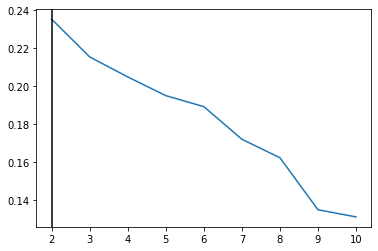

In [463]:
silhoutte_function_general(df_v1 ,linkage = 'ward')

In [457]:
##training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3 ,
                                     affinity='euclidean' , 
                                     linkage= 'ward').fit(df_v1)

df_clustered['cluster'] = clustering.labels_
px.scatter( x = df_tsne[0] , y = df_tsne[1]  , color=df_clustered['cluster'])


#### we can see that best k is from 2 to 4 (ward method) and ward is the best in diffrentiation between the clusters

### comments:
1- performed log transform to handle skewness


2- standard scalar to scale the features


3- pca and kpca to make dimensionality reduction 


4- kmeans as clustering technique


5- tsne to visualize the clusters


6- tried to perform clustering (kmeans) after the tsne and got somehow good results


7- tried aggomolrative clustering on the data (with different linkage methods)


8- the clustering (k means and agomolrative ) didn't perform very well on the data (silhoutte score is 45% maximum)


9- I uploaded the past assignment cuz I assigned them on class room not canvas

In [362]:
##47% silhoutte score in tsne (pca)(k=4)
## 28% silhoutte score in df_pca (k=2)
##  27% silhoutte score in df_v1 without pca) (k=2)
## 45 % silhoutte score in tsne without pca (k=6,7,12)